<a href="https://colab.research.google.com/github/szymonszczurowski/Housing-Market-Analysis/blob/main/housing_price_predictor_using_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing price predictor model

## 1.0.0 Importing Libraries and Packages

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

## 2.0.0 Data




### 2.1.0 Importing the Data Set

In [198]:
dwellings = pd.read_csv('drive/MyDrive/Housing_Project/dwellings.csv')

In [199]:
dwellings.head()

,Date,Market,Gross_Price,Number_of_Rooms,Floor,Usable_Area,Usable_area_of_a_p
0,1547424000000000000,pierwotny,100000.0,3,2,48.45,0.00
1,1547164800000000000,pierwotny,82500.0,2,4,38.22,0.00
2,1546560000000000000,wtórny,140000.0,2,3,51.35,0.00
3,1548979200000000000,wtórny,240000.0,3,2,61.00,2.97
4,1550102400000000000,pierwotny,100000.0,3,1,37.60,2.50


In [200]:
dwellings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                245 non-null    int64  
 1   Market              245 non-null    object 
 2   Gross_Price         245 non-null    float64
 3   Number_of_Rooms     245 non-null    int64  
 4   Floor               245 non-null    int64  
 5   Usable_Area         245 non-null    float64
 6   Usable_area_of_a_p  245 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 13.5+ KB


2.2.0 Data processing and preparation

In [201]:
numerical_features = dwellings[['Date', 'Number_of_Rooms', 'Floor', 'Usable_Area', 'Usable_area_of_a_p']]
categorical_features = dwellings[['Market']]

encoder = OneHotEncoder(sparse_output=False)
categorical_encoded = encoder.fit_transform(categorical_features)

In [202]:
X = pd.concat([pd.DataFrame(numerical_features), pd.DataFrame(categorical_encoded)], axis=1)
y = dwellings['Gross_Price']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
X_train.head()

,Date,Number_of_Rooms,Floor,Usable_Area,Usable_area_of_a_p,0,1
229,1690502400000000000,3,1,37.20,0.0,0.0,1.0
209,1673395200000000000,3,2,36.80,0.0,0.0,1.0
96,1598313600000000000,4,4,46.10,0.0,1.0,0.0
168,1647388800000000000,2,1,34.90,6.7,0.0,1.0
84,1590537600000000000,5,2,90.58,0.0,0.0,1.0


In [205]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(1)

])

In [206]:
# tf.keras.utils.plot_model(model, "huousing.png", show_shapes=True)

In [207]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)

In [208]:
history = model.fit(X_train, y_train, epochs=95)

Epoch 1/95
7/7 [==============================] - 1s 10ms/step - loss: 39859810304.0000 - root_mean_squared_error: 199649.2188
Epoch 2/95
7/7 [==============================] - 0s 8ms/step - loss: 39854891008.0000 - root_mean_squared_error: 199636.8906
Epoch 3/95
7/7 [==============================] - 0s 10ms/step - loss: 39837356032.0000 - root_mean_squared_error: 199592.9688
Epoch 4/95
7/7 [==============================] - 0s 10ms/step - loss: 39794958336.0000 - root_mean_squared_error: 199486.7344
Epoch 5/95
7/7 [==============================] - 0s 8ms/step - loss: 39699890176.0000 - root_mean_squared_error: 199248.3125
Epoch 6/95
7/7 [==============================] - 0s 8ms/step - loss: 39512682496.0000 - root_mean_squared_error: 198777.9688
Epoch 7/95
7/7 [==============================] - 0s 9ms/step - loss: 39187202048.0000 - root_mean_squared_error: 197957.5781
Epoch 8/95
7/7 [==============================] - 0s 9ms/step - loss: 38600015872.0000 - root_mean_squared_error: 1

In [209]:
mse_test, rmse_test = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 2289400832.0000 - root_mean_squared_error: 47847.6836


In [210]:
X_new = X_test[:30]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 70ms/step


In [211]:
y_test = y_test[:30]
y_test

24     168000.0
6      115000.0
153    273000.0
212    300000.0
199    200000.0
177    327000.0
193    138240.0
124     80000.0
9      150000.0
101    135000.0
45      97000.0
211     98000.0
117    140000.0
172    376510.0
82     216000.0
146    157000.0
190    178000.0
15      60000.0
66     120000.0
142    185000.0
33      50000.0
19     100000.0
109    150000.0
30     210000.0
206     80000.0
120    305000.0
10     250000.0
73     190000.0
159    490000.0
156    100000.0
Name: Gross_Price, dtype: float64

In [212]:
# y_pred


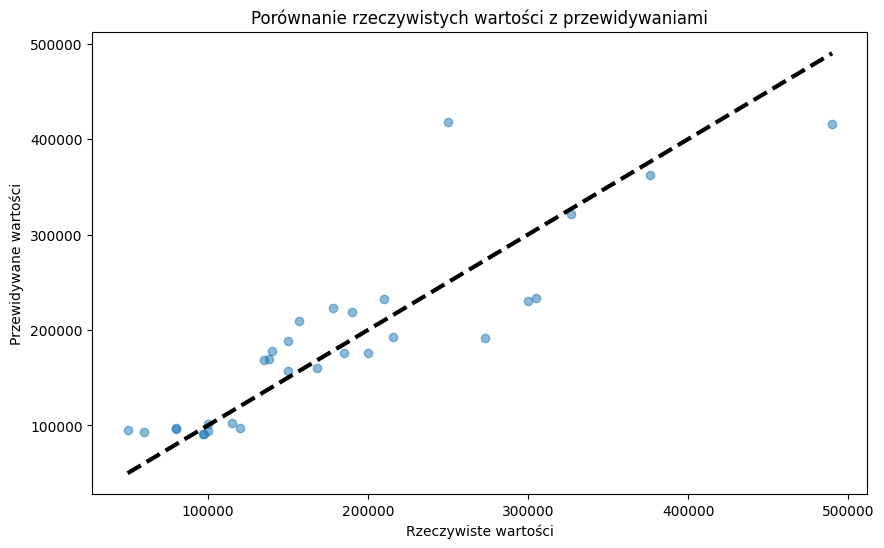

In [213]:
y_pred = y_pred.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Porównanie rzeczywistych wartości z przewidywaniami')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # Linia odniesienia
plt.show()

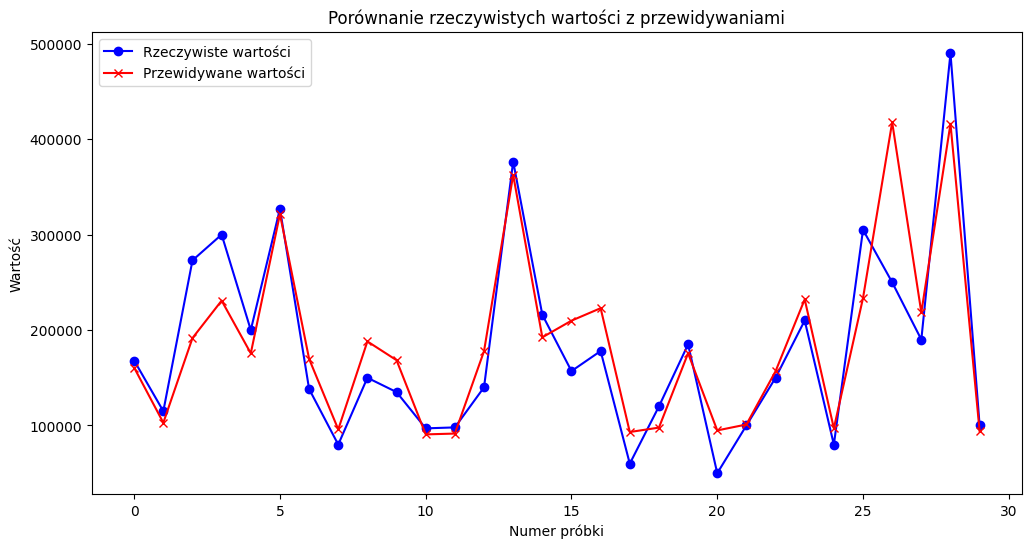

In [214]:
x_axis = range(len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(x_axis, y_test, label='Rzeczywiste wartości', color='blue', marker='o')
plt.plot(x_axis, y_pred, label='Przewidywane wartości', color='red', marker='x')
plt.title('Porównanie rzeczywistych wartości z przewidywaniami')
plt.xlabel('Numer próbki')
plt.ylabel('Wartość')
plt.legend()
plt.show()
